# Project 3A: Covid-19 data reporting the number of confirmed cases / day.
# Project 3B: Fashion MNIST
## University of Toronto | Project by Riyan Roy

## Part 1: COVID-19 Time Series Analysis

1. Created a function to plot time-series for selected countries (US, China, Canada).
2. Applied StandardScaler to standardize the data.
3. Discussed trends in standardized time-series for the US, Canada, and China.

## Part 2: PCA and Eigenvalue Analysis

1. Computed the covariance matrix of the dataset.
2. Developed a function to obtain sorted eigenvalues and eigenvectors.
3. Visualized principal components with a scree plot.
4. Determined the number of PCs needed to cover 98% of dataset variance.
5. Plotted the first 16 principal components as time series.
6. Compared trends between the first few PCs and the rest.

## Part 3: Data Reconstruction

Created a function to:
1. Plot original time-series for a specific country.
2. Display incremental reconstruction using various PCs.
3. Illustrate residual error and RMSE for reconstructions.
4. Tested the function with US, Canada, and China as inputs.

## Part 4: Fashion-MNIST Compression

1. Selected similar items from three distinct categories for compression.
2. Computed eigenvectors and eigenvalues.
3. Plotted the first 10 eigenvectors.
4. Developed a function for image reconstruction with selected PCs.
5. Determined the number of components required for human identification.
6. Calculated the compression ratio for sharing eigenvectors and projections.

The project encompasses time-series analysis, PCA, data reconstruction, and image compression using PCA, providing insights into trends, dimensionality reduction, and efficient data sharing.


# Part 1: Getting started [2 Marks]

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math
import random

In [ ]:
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/APS_COVID_Jan22.csv',
    index_col=0,
    thousands=','
)

In [ ]:
cases_raw

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649
Albania,0,0,0,0,0,0,0,0,0,0,...,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070
Algeria,0,0,0,0,0,0,0,0,0,0,...,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670
Andorra,0,0,0,0,0,0,0,0,0,0,...,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025
Angola,0,0,0,0,0,0,0,0,0,0,...,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,1991484,2007862,2023546,2023546,2062128,2078087,2094802,2110737,2126444,2141422
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474234,474234,474234,476328,477151,478084,479343,480583,480583,480583
Yemen,0,0,0,0,0,0,0,0,0,0,...,10233,10233,10252,10352,10408,10449,10507,10585,10585,10585
Zambia,0,0,0,0,0,0,0,0,0,0,...,293695,295028,296132,296817,298032,299172,299971,300587,301203,301630


1. Write a function to do the following: **[0.5]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.5]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.5]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate? **[0.5]**

In [ ]:
### YOUR CODE HERE ###
#Part 1; Question1 - Writing a function which takes dataframe and country as input, and plots time series
def country_plot(input_data,country):
  cntry_ind = list(cases_raw.index) #Captures the list of countries from the index of the countries
  cntry_index = []

  for c in country:
    index = []
    index = cntry_ind.index(c)
    cntry_index = np.append(cntry_index,index)

  fig,axes = plt.subplots(2,2, figsize=(15,10))
  fig.suptitle('Country wise COVID-19 cases time series plot')
  for i,j in enumerate(cntry_index):
    axes.flat[i].plot(input_data[int(j),:])
    axes.flat[i].set(xlabel='Day',ylabel=country[i])
  fig.delaxes(axes[1,1])

In [ ]:
scaler = StandardScaler()
std_country_list = scaler.fit_transform(cases_raw)


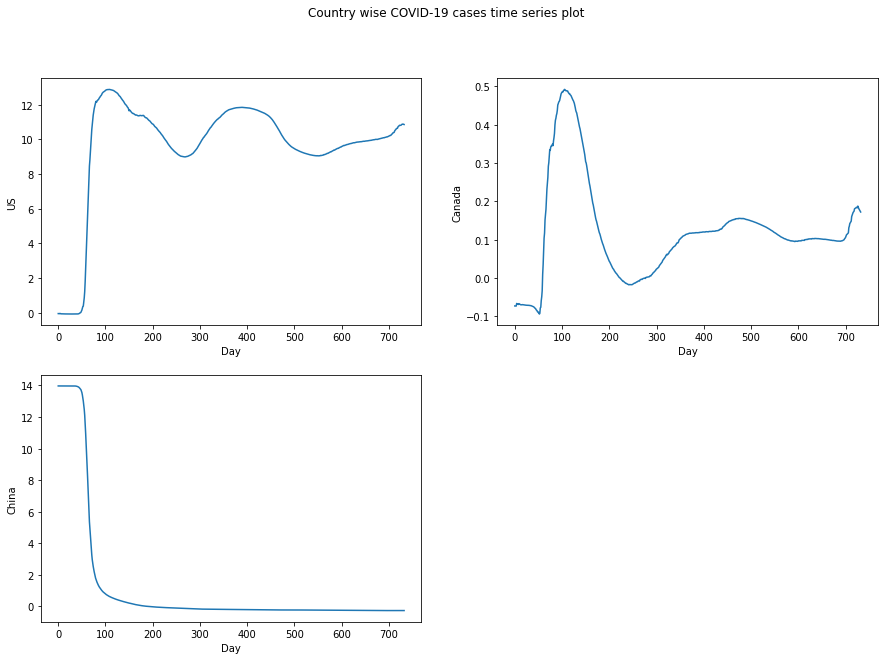

In [ ]:
country_plot(std_country_list,['US','Canada','China'])

**Part 1: Question 4**
As seen during the initial 100 days, cases in the US & Canada increased exponentialy, while China was already having a large number of cases within the first 100 days (Since the origin of COVID-19 was China and as per WHO report-2020, the cases in China for the first 3 months was the highest in the world).
For the US, the cases didn't drop and followed slight ups and downs, whereas in Canada, the cases dropped after 3 months, but then it peaked again after 1 year.
Contrastingly, the cases in China dropped drastically after tge first 3 months when compared to other countries.

Since the data is standardised, the negative cases on y axis indicates that the cases for those particular days were less than the mean of the dataset(Happens due to subtracting mean from the data). While, when the data is positive, it means that it is much more higher than the mean of the dataset.
Therefore, positive datapoints indicates that the cases were more than the mean (peak cases), while the negative indicates that the cases were less than the mean number of cases.

# Part 2: Applying PCA [3 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (733, 733).* **[0.5]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.5]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`(Bars for each componenet and a line to show cumulative --similar to tutoriual. Limit x-axis if needed to better see the plot). **[0.5]**
4. How many PCs do you need to cover 98% of the dataset's variance? **[0.5]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

In [14]:
### Part2: Question 1 - computing the covariance matrix ###
covar_cases_country = np.cov(std_country_list.T)
### Part 2 Question 2- Defining function which takes covariance matrix as input and return eigen values and vectors in sort
def get_sorted_eigen(df_cov):
  eigen_val,eigen_vector = np.linalg.eigh(df_cov)
 # Sorting eigen values in descending order
  args = (-eigen_val).argsort()
  eigen_val = eigen_val[args]
  eigen_vector = eigen_vector[:, args]

  return eigen_val,eigen_vector

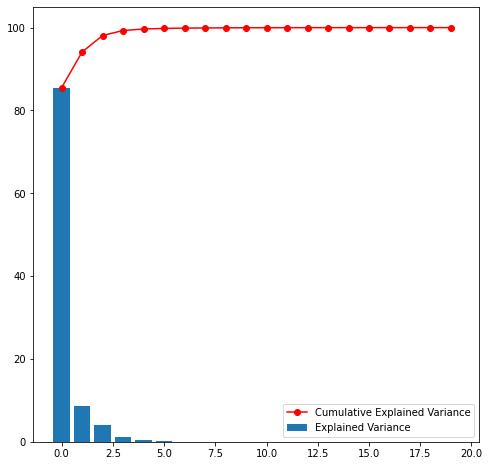

In [ ]:

eigen_val_1,eigen_vect_1 = get_sorted_eigen(covar_cases_country)
eig_val_sum = sum(eigen_val_1)
exp_Var = [eigV/eig_val_sum*100 for eigV in eigen_val_1]
cum_exp_Var = np.cumsum(exp_Var) # Reference https://sparkbyexamples.com/numpy/numpy-cumsum-function/

plt.figure(figsize=(8,8))
plt.bar(range(20), exp_Var[:20], label='Explained Variance')
plt.plot(cum_exp_Var[:20], 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

In [ ]:
# Part 2: question 4 - Number of PCs required to cover more than 98% of the variance of the dataset
index_98 = np.where(cum_exp_Var>98)[0][0]
print("Number of principal components required to cover 98% of the dataset variance is ",index_98+1)

Number of principal components required to cover 98% of the dataset variance is  3


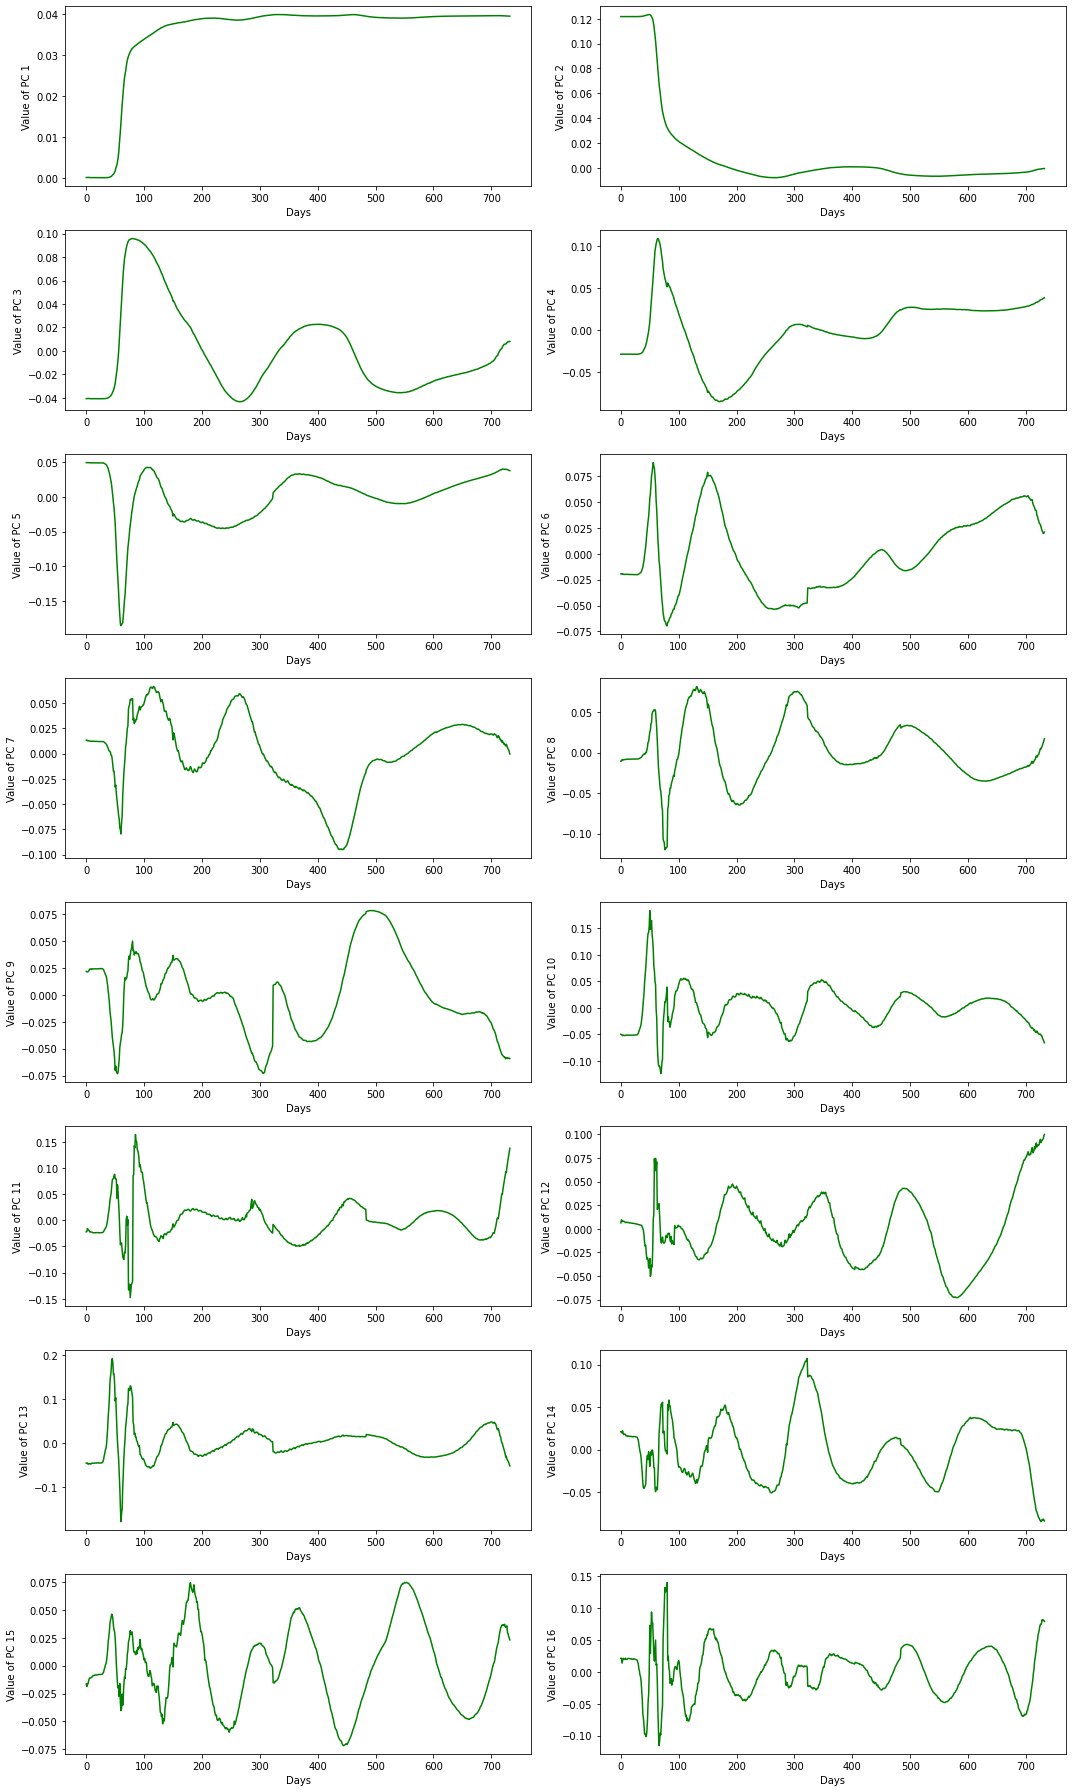

In [ ]:
n_PC = 16
fig_2,axes_2 = plt.subplots(8,2, figsize=(15,25))
for k in range(16):
    axes_2.flat[k].plot(eigen_vect_1[:,k],color='g')
    axes_2.flat[k].set(xlabel='Days',ylabel='Value of PC {}'.format(k+1))

fig_2.tight_layout()

**Part 2 Question 6**
As evident from the figure, the first few PCs are more similar to the original dataset, while the graph starting with 4th principal component, cover less variance. This indicates that the first few PCs(3 in this case) cover most of the variance (ability to adapt the behaviour of the dataset) of the data.

# Part 3: Data reconstruction [5 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigen vectors and eigen values.
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[1]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable):
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[1]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error.
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 100 (this part is independent from part 3.2.) **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[1]**


In [ ]:
# Part 3 : Question 1 & 2 Defining the function which takes dataframe and country list as input, return 4 graphs
def plot_country_figures(original_df, country_name):
  global eigen_values,eigen_vector
  norm_country_list = scaler.fit_transform(original_df)
  covariance_matrix = np.cov(norm_country_list.T)
  eigen_values,eigen_vector = get_sorted_eigen(covariance_matrix)

  fig_func,axes_func= plt.subplots(2,2,figsize=(25,20))
  fig_func.suptitle('Original time series for countries indicating the number of COVID-19 cases')


  cntry_ind = []
  cntry_index = []
  cntry_ind = list(cases_raw.index)

  cntry_index = int(cntry_ind.index(country_name))


  axes_func[0,0].plot(original_df.values[cntry_index,:])
  axes_func[0,0].set(xlabel='Day',ylabel=country_name)


  # Reconstruction using Principal Component 1
  n_PC1 = 1

  w_1 = eigen_vector[:,0:n_PC1]
  projection_vect_1 = np.dot(norm_country_list,w_1)
  reconx_1 = np.dot(projection_vect_1,w_1.T)
  reconstruct_vect_1 = scaler.inverse_transform(reconx_1)
  axes_func[0,1].plot(reconstruct_vect_1[cntry_index,:],label='PC1')
  axes_func[0,1].set(xlabel='Days',title='Reconstruction using 1st principal component')

  # Reconstruction using Principal Component 1 and 2
  n_PC2 = 2
  w_2 = eigen_vector[:,0:n_PC2]
  projection_vect_2 = np.dot(norm_country_list,w_2)
  reconx_2 = np.dot(projection_vect_2,w_2.T)
  reconstruct_vect_2 = scaler.inverse_transform(reconx_2)
  axes_func[0,1].plot(reconstruct_vect_2[cntry_index,:],label='PC1')
  axes_func[0,1].set(xlabel='Days',title='Reconstruction using 1st & 2nd principal component')


  # Reconstruction using Principal Component 1 to 4
  n_PC3 = 4
  w_3 = eigen_vector[:,0:n_PC3]
  projection_vect_3 = np.dot(norm_country_list,w_3)
  reconx_3 = np.dot(projection_vect_3,w_3.T)
  reconstruct_vect_3 = scaler.inverse_transform(reconx_3)
  axes_func[0,1].plot(reconstruct_vect_3[cntry_index,:],label='PC1 to PC4')
  axes_func[0,1].set(xlabel='Days',title='Reconstruction using 1st to 4th principal component')


  # Reconstruction using Principal Component 1 to 8
  n_PC4 = 8
  w_4 = eigen_vector[:,0:n_PC4]
  projection_vect_4 = np.dot(norm_country_list,w_4)
  reconx_4 = np.dot(projection_vect_4,w_4.T)
  reconstruct_vect_4 = scaler.inverse_transform(reconx_4)
  axes_func[0,1].plot(reconstruct_vect_4[cntry_index,:],label='PC1 to PC8')
  axes_func[0,1].set(xlabel='Days',title='Reconstruction using 1st to 8th principal component')

    # Reconstruction using Principal Component 1 to 16
  n_PC5 = 16
  w_5 = eigen_vector[:,0:n_PC5]
  projection_vect_5 = np.dot(norm_country_list,w_5)
  reconx_5 = np.dot(projection_vect_5,w_5.T)
  reconstruct_vect_5 = scaler.inverse_transform(reconx_5)
  recon_5 = pd.DataFrame(reconstruct_vect_5)
  axes_func[0,1].plot(reconstruct_vect_5[cntry_index,:],label='PC1 to PC16')
  axes_func[0,1].set(xlabel='Days',title='Reconstruction using 1st to 16th principal component')
  axes_func[0,1].legend()

  #### GRAPH 3 for finding Residual Error v/s Days (Part 3 : Question 1 & 2 Defining the function which takes dataframe and country list as input, return 4 graphs)
  r_error = original_df.values[cntry_index,:]-recon_5.values[cntry_index,:]
  r_er = pd.DataFrame(r_error)
  axes_func[1,0].plot(r_er,label='Residual Error',color='r')
  axes_func[1,0].set(xlabel='Days',title='Residual Error v/s Days')


  #### GRAPH 4 for finding RMSE from (Part3:question 4)
  rmse_list = []
  for i in range(1,100):
    w_6 = eigen_vector[:,0:i]
    projection_vect_6 = np.dot(norm_country_list,w_6)
    reconx_6 = np.dot(projection_vect_6,w_6.T)
    reconstruct_vect_6 = scaler.inverse_transform(reconx_6)
    recon_6 = pd.DataFrame(reconstruct_vect_6)
    mse = mean_squared_error(original_df.values[cntry_index,:],recon_6.values[cntry_index,:])
    rmse = math.sqrt(mse)
    rmse_list.append(rmse)

  axes_func[1,1].plot(rmse_list,label='RMSE',color='orange')
  axes_func[1,1].set(xlabel='Principal components',title='RMSE vs Principal components')


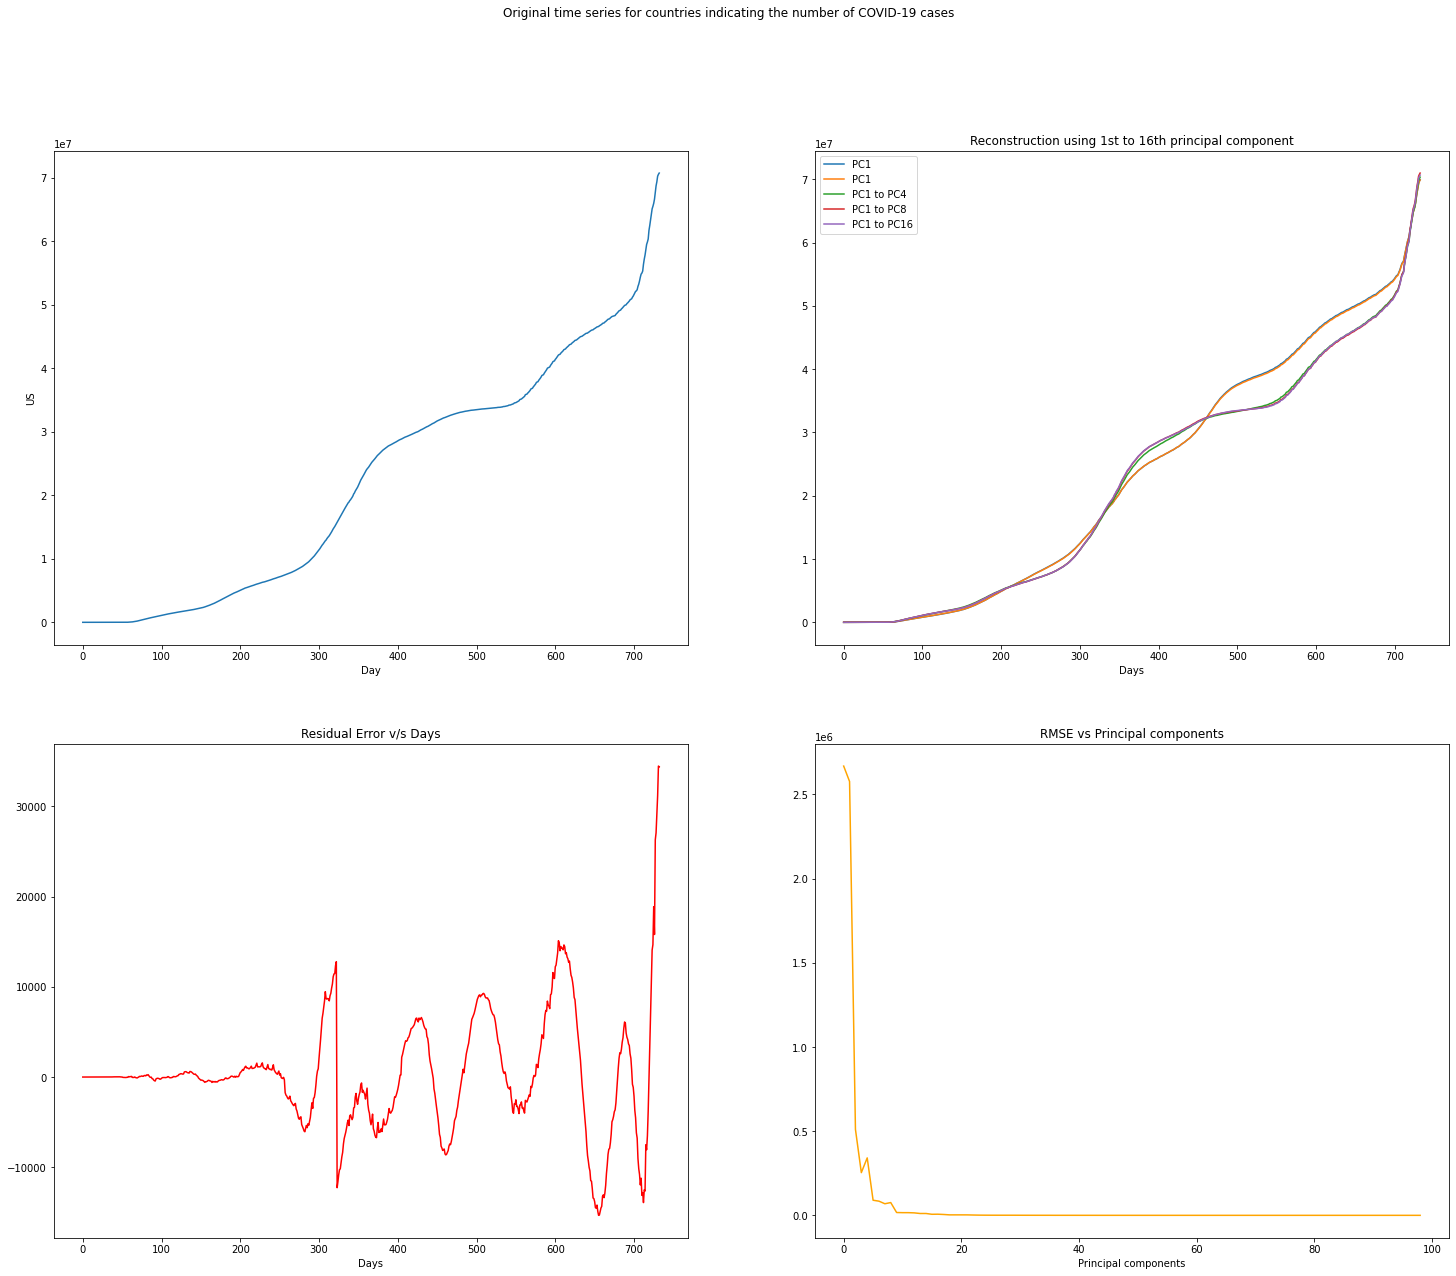

In [ ]:
  plot_country_figures(cases_raw, 'US')

In [ ]:
plot_country_figures(cases_raw, 'Canada')

In [ ]:
plot_country_figures(cases_raw, 'China')

Assumption - I am considering the first 16 PCs as the best number of PCs which give reconstruction similar to the original data.

# Part 4: Fashion-MNIST dataset [4 Marks]
Fashion-MNIST is a dataset for clothes.
Each image in Fashion-MNIST has 28x28 pixels which can be represented in an array with 784 elements. You can take a better look at this dataset in this [link](https://www.openml.org/d/40996)

In this part, we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.
* Create a new dataset by selecting images from *only* three categories (three distinct labels).
    * To compress and reconstruct images better with PCA, it is better to choose items that are similar in shape. why? **[0.5]**
* Compute Eigenvectors and Eigenvalues. **[0.5]**
* Plot the first 10 eigenvectors (as images similar to eigenfaces). What trends do you observe? **[0.5]**
* Create a function that requires an argument $n$ and plots a random image from the dataset, as well as a reconstruction with the first $n$ th principal components. **[1]**
* Run your function a few times, and determine how many components are required so that we (humans!) can identify the items. **[0.5]**
* Assume you want to share this dataset with someone else. Instead of directly giving them the whole dataset, you can share the eigenvectors (some of them) and projections with them, and thay can do a dot product to get the reconstructions.  Based on the number of components that you found in the last step, what would be the compression ratio for a dataset with 1000 images? **[1]**
  * Hint: compare the dataset size with a case where we only use some principal components and projections.

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("Fashion-MNIST")
x = mnist.data[0:1000]
y = mnist.target[0:1000]
target_encoding = {0: "T-shirt/top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"}

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
x.shape

(1000, 784)

In [6]:
# Part 4: Question 1- Creating new dataset using the original dataset by choosing 3 distinct labels - 0 {Tshirts}, 2 {Pullover} & 6{Shirt}
y_final = pd.to_numeric(y)
class_index = []
for i in [0,2,6]:
  idx = []
  idx = np.where(y_final==i)
  class_index = np.append(class_index,idx)

Since the items which are similar will be having similar pixel data, the eigen values will be higher for them, due to which the PC chosen will be more accurate.

Hence it is preferred to choos items which are similar in this case tshirt, shirts and pullover


In [7]:
x_f = x.iloc[class_index]
# List which contains data from labels/class 0,2,6
scaler2 = StandardScaler()
x_final = pd.DataFrame(scaler2.fit_transform(x_f))
x_final.head(5)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,-0.078621,-0.07076,-0.104243,-0.101761,0.096569,-0.150627,-0.269056,-0.405957,-0.551419,...,1.062846,1.189837,1.866558,1.068634,-0.619957,-0.571607,-0.393647,-0.210622,-0.076622,-0.060045
1,0.0,-0.078621,-0.07076,-0.104243,-0.101761,-0.122771,-0.150627,-0.269056,-0.405957,-0.078187,...,-0.881857,-0.745068,-0.590955,-0.546539,-0.619957,-0.571607,-0.393647,-0.210622,-0.076622,-0.060045
2,0.0,-0.078621,-0.07076,-0.104243,-0.101761,-0.122771,-0.150627,-0.269056,-0.405957,-0.551419,...,-0.881857,-0.745068,-0.610006,-0.546539,-0.619957,-0.571607,-0.393647,-0.210622,-0.076622,-0.060045
3,0.0,-0.078621,-0.07076,-0.104243,-0.101761,-0.122771,-0.150627,0.287177,3.628014,3.750693,...,1.079188,1.121946,2.399972,-0.163998,-0.619957,-0.520169,-0.393647,-0.210622,-0.076622,-0.060045
4,0.0,-0.078621,-0.07076,-0.104243,-0.101761,-0.122771,-0.150627,-0.269056,-0.405957,-0.551419,...,0.605269,0.612760,0.266317,-0.546539,-0.619957,-0.554461,-0.393647,-0.210622,-0.076622,-0.060045


In [8]:
def getBasisCountThatPreservesVariance(eigenValues, variance=0.98):
    for idx, cumulativeSum in enumerate(np.cumsum(eigenValues) / np.sum(eigenValues)):
        if cumulativeSum > variance:
            return idx
# Part 4: Question 2- Defining the function to compute eigen vectors and eigen values

def pca(X):
    n, d = X.shape
    mu = X.mean(axis=0)
    X = X - mu # standardising data

    if n > d:
        C = np.dot(X.T,X) / (n-1) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
    else:
        C = np.dot(X,X.T) / (n-1) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
        eigenVectors = np.dot(X.T, eigenVectors)
        for i in range(n):
            eigenVectors[:,i] = eigenVectors[:, i] / np.linalg.norm(eigenVectors[:, i])

    print ("Dim of Full Eigen Vectors", eigenVectors.shape)

    # sort eigenVectors in descending order by their eigenValue
    idx = np.argsort(-eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:, idx]

    # select based on numOfBasis
    numOfBasis = getBasisCountThatPreservesVariance(eigenValues)
    print('Number of useful eigenBasis are: ', numOfBasis)

    return eigenValues, eigenVectors, mu
def project (W , X , mu):
    return np.dot (X - mu , W)
def reconstruct (W , Y , mu) :
    return np.dot (Y , W.T) + mu

In [9]:
eigen_val_n,eigen_vect_n,mean_n = pca(x_f)

Dim of Full Eigen Vectors (784, 293)
Number of useful eigenBasis are:  125


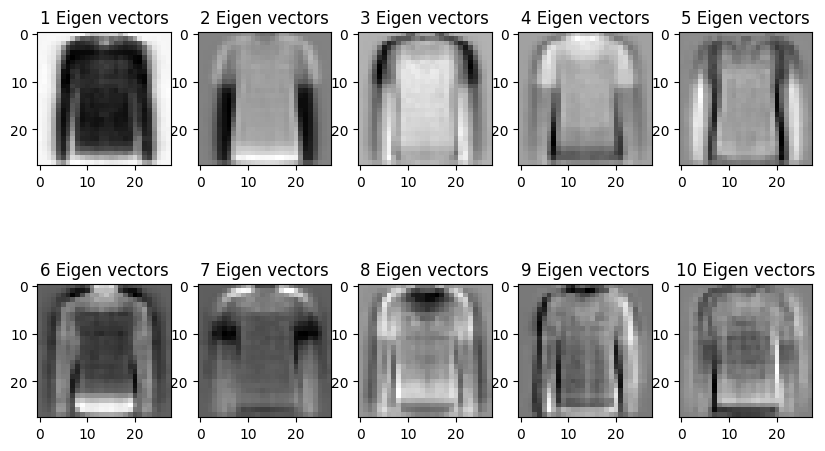

In [10]:
# Part 4: Question 3-Ploting the first 10 eigenvectors/eigenfaces
COUNT = 10
ROWS = math.ceil(COUNT/5)
fig = plt.figure(figsize=(10, ROWS*3))
for i in range(0, COUNT):
    plt.subplot(ROWS, 5, i+1)
    plt.imshow(eigen_vect_n[:, i].reshape(-1, 28), cmap = plt.cm.gray)
    plt.title('{} Eigen vectors'.format(i+1))

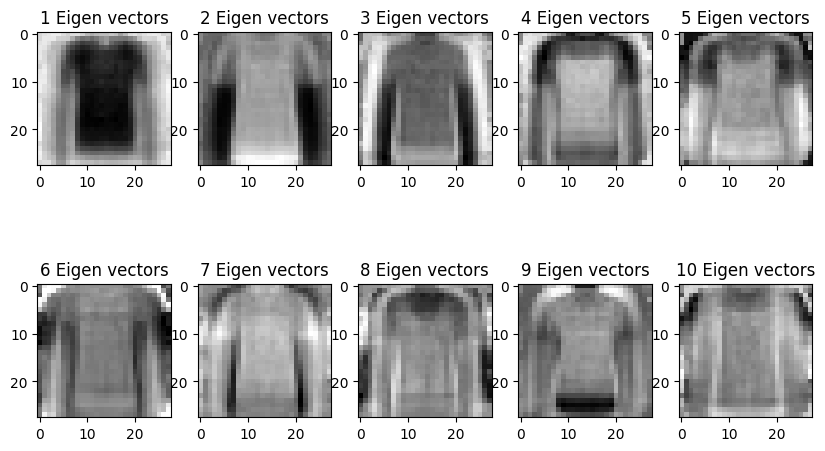

In [15]:
# Computing covariance matrix and computing eigen values and eigen vectors
covar_img = np.cov(x_final.T)
eigen_val_n,eigen_vect_n = get_sorted_eigen(covar_img)

# Part 4: Question 3-Ploting the first 10 eigenvectors/eigenfaces
COUNT = 10
ROWS = math.ceil(COUNT/5)
fig = plt.figure(figsize=(10, ROWS*3))
for i in range(0, COUNT):
    plt.subplot(ROWS, 5, i+1)
    plt.imshow(eigen_vect_n[:, i].reshape(-1, 28), cmap = plt.cm.gray)
    plt.title('{} Eigen vectors'.format(i+1))

Trend Observed as per the number of eigen vectors:
The first eigen vector or eigen face (after sorting) resembles to the original image, while as we go down to the next eigen vector, the clarity or resemblance is not clear. This is beacuse the eigen values are sorted from highest to lowest, and as per the sort, the eigen vector set is created. Hence the datset with the first eigen vector is able to produce more clear image when compared with the others.

In [16]:
# Part 4: Question 4- Function that takes 'n' as input, where n=number of principal components, and plots a random image from the dataset, a reconstruction with the first nth PCs.
def n_plot_recon(n):
  # Plotting a random image from the dataset
  index_n = (x_final.sample()).index

  wx_n = eigen_vect_n[:,0:n]
  projection_vect_n = np.dot(x_final,wx_n)
  reconx_n = np.dot(projection_vect_n,wx_n.T)

  size_projection_matrix = projection_vect_n.size
  size_original_matrix = x_final.size

  #print(wx_n.shape,projection_vect_n1.shape,compression_ratio)
  reconstruct_vect_n = scaler2.inverse_transform(reconx_n)
  recon_n = pd.DataFrame(reconstruct_vect_n)

  fig_fn,(axes_fn_1,axes_fn_2) = plt.subplots(1,2,figsize=(5,5))
  axes_fn_1.imshow(x_final.loc[index_n].values.reshape(28, 28), cmap = plt.cm.gray)
  axes_fn_2.imshow(recon_n.loc[index_n].values.reshape(28, 28), cmap = plt.cm.gray)
  # Part 4: Question 6 Calculating Compression ratio
  compression_ratio = size_original_matrix/size_projection_matrix
  print('The compression ratio for the dataset based on 10 number of PCs =',compression_ratio)


The compression ratio for the dataset based on 10 number of PCs = 78.4


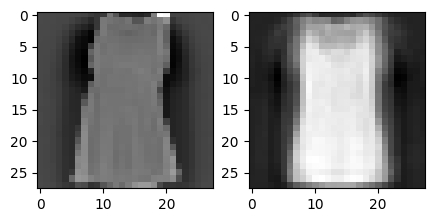

In [17]:
# Part 4: Question 5 - Running the function a few times to determine the number of components  required to identify the items
n_plot_recon(10)

The compression ratio for the dataset based on 10 number of PCs = 784.0


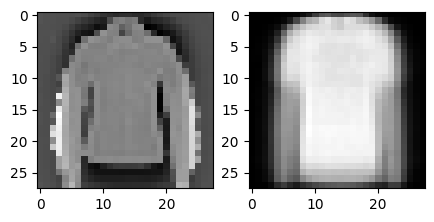

In [18]:
n_plot_recon(1)

The compression ratio for the dataset based on 10 number of PCs = 156.8


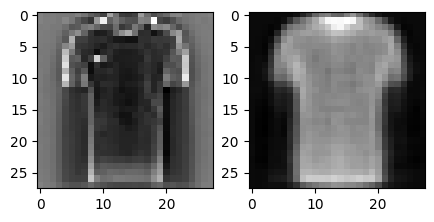

In [19]:
n_plot_recon(5)

The compression ratio for the dataset based on 10 number of PCs = 39.2


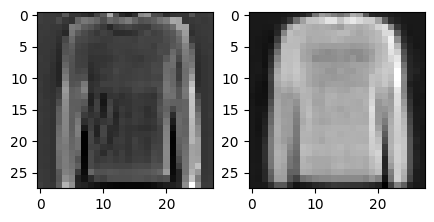

In [20]:
n_plot_recon(20)

From the above computations using 10,1,5 and 20 PCs, I conclude that 10 PCs are enough to reconstruct the image which can be identified as the original item with human eye.

Compression ratio = original dataset/dataset required for reconstruction (projection matrix size)

compression ratio = 293*784/293*10 = 78.4

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

